# Import Libraries

In [1]:
!pip install numpy
import numpy as np

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
!pip install pandas
import pandas as pd

# Exploratory Data Analysis

In [9]:
df = pd.read_csv('/kaggle/input/task-intern/customer_churn_large_dataset-Copy1.csv')

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  100000
nNumber of features: 9
nData Features:
['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
nMissing values: 0
nUnique values:
CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64


In [11]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [12]:
df.min()

CustomerID                             1
Name                          Customer_1
Age                                   18
Gender                            Female
Location                         Chicago
Subscription_Length_Months             1
Monthly_Bill                        30.0
Total_Usage_GB                        50
Churn                                  0
dtype: object

In [13]:
df.max()

CustomerID                            100000
Name                          Customer_99999
Age                                       70
Gender                                  Male
Location                            New York
Subscription_Length_Months                24
Monthly_Bill                           100.0
Total_Usage_GB                           500
Churn                                      1
dtype: object

In [14]:
target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

In [15]:
#Defining bar chart function
def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [16]:
bar('Gender')
bar('Location')
bar('Age')

In [17]:
bar('Total_Usage_GB')
bar('Subscription_Length_Months')
bar('Monthly_Bill')

In [18]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [19]:
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [20]:
hist('Subscription_Length_Months')
hist('Monthly_Bill')
hist('Total_Usage_GB')

In [21]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(df['Subscription_Length_Months'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(df['Monthly_Bill'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(df['Total_Usage_GB'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = df['Churn']

#Plot the bar chart of the binned variables
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

In [22]:
df.drop(["Name"],axis=1,inplace = True)

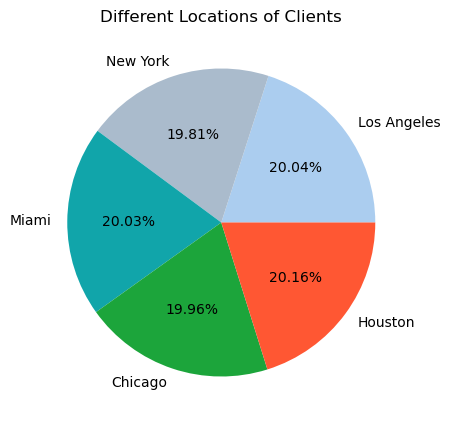

In [23]:
import matplotlib.pyplot as plt

# Replace the placeholder values with the actual counts for each location
Los_Angeles = (df[df.Location == 'Los Angeles']).shape[0]
New_York = (df[df.Location == 'New York']).shape[0]
Miami = (df[df.Location == 'Miami']).shape[0]
Chicago = (df[df.Location == 'Chicago']).shape[0]
Houston = (df[df.Location == 'Houston']).shape[0]

plt.figure(figsize=(8, 5))

labels = ['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston']
colors = ['#abcdef', '#aabbcc', '#11A5AA', '#1CA53B', '#FF5733']

plt.pie([Los_Angeles, New_York, Miami, Chicago, Houston], labels=labels, colors=colors, autopct='%.2f%%')

plt.title('Different Locations of Clients')

plt.show()


/tmp/ipykernel_28/3495779516.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




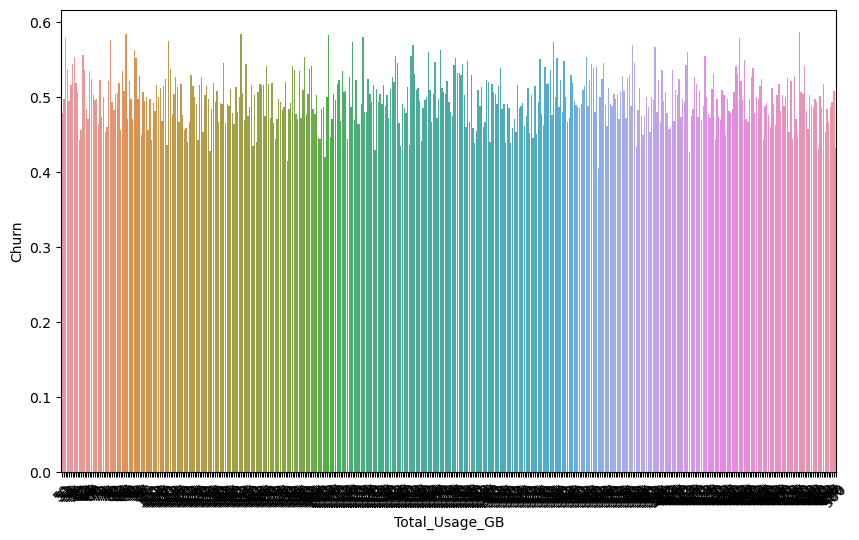

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Usage_GB', y='Churn', data=df, ci=None)
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd

# Calculate ratio of Monthly_Bill to Subscription_Length_Months
#df['Bill_Per_Month'] = df['Monthly_Bill'] / df['Subscription_Length_Months']

# Calculate ratio of Total_Usage_GB to Subscription_Length_Months
df['Usage_Per_Month'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# Defining Senior Citizen
df['Senior_Citizen'] = df['Age'] > 60
df['Senior_Citizen'] = df['Senior_Citizen'].astype(int)

# Total BIll
df['Total_Charges'] = df['Monthly_Bill'] * df['Subscription_Length_Months']

# Charges per GB
df['Cost_Per_GB'] = df['Total_Usage_GB'] / df['Total_Charges']

# Monthly Usage Trend
#df['Monthly_Usage_Trend'] = df.groupby('CustomerID')['Total_Usage_GB'].diff()

# Long Term Customer
df['Long_Term_Customer'] = (df['Subscription_Length_Months'] > 12).astype(int)

# Usage Behaviour
usage_bins = [0, 50, 150, float('inf')]
usage_labels = ['Light', 'Moderate', 'Heavy']
df['Usage_Behavior'] = pd.cut(df['Total_Usage_GB'], bins=usage_bins, labels=usage_labels)

# Average Monthly Usage per Location
df['Avg_Monthly_Usage_Per_Location'] = df.groupby('Location')['Total_Usage_GB'].transform('mean')

# Usage Change Percentage:
df['Usage_Change_Percentage'] = df.groupby('CustomerID')['Total_Usage_GB'].pct_change() * 100

# Average Monthly Usage per Location
df['Avg_Monthly_Usage_Per_Location'] = df.groupby('Location')['Total_Usage_GB'].transform('mean')

# Usage Variation
df['Usage_Variation'] = df.groupby('CustomerID')['Total_Usage_GB'].transform('std')

# Price Sensitivity:
df['Price_Sensitivity'] = df['Monthly_Bill'] / df['Subscription_Length_Months']





# Print the first few rows of the updated dat
df.head()


,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_Per_Month,Senior_Citizen,Total_Charges,Cost_Per_GB,Long_Term_Customer,Usage_Behavior,Avg_Monthly_Usage_Per_Location,Usage_Change_Percentage,Usage_Variation,Price_Sensitivity
0,1,63,Male,Los Angeles,17,73.36,236,0,13.882353,1,1247.12,0.189236,1,Heavy,273.986727,NaN,NaN,4.315294
1,2,62,Female,New York,1,48.76,172,0,172.000000,1,48.76,3.527482,0,Heavy,275.138142,NaN,NaN,48.760000
2,3,24,Female,Los Angeles,5,85.47,460,0,92.000000,0,427.35,1.076401,0,Heavy,273.986727,NaN,NaN,17.094000
3,4,36,Female,Miami,3,97.94,297,1,99.000000,0,293.82,1.010823,0,Heavy,274.737756,NaN,NaN,32.646667
4,5,46,Female,Miami,19,58.14,266,0,14.000000,0,1104.66,0.240798,1,Heavy,274.737756,NaN,NaN,3.060000


In [26]:
df.isnull().sum()

CustomerID                             0
Age                                    0
Gender                                 0
Location                               0
Subscription_Length_Months             0
Monthly_Bill                           0
Total_Usage_GB                         0
Churn                                  0
Usage_Per_Month                        0
Senior_Citizen                         0
Total_Charges                          0
Cost_Per_GB                            0
Long_Term_Customer                     0
Usage_Behavior                         0
Avg_Monthly_Usage_Per_Location         0
Usage_Change_Percentage           100000
Usage_Variation                   100000
Price_Sensitivity                      0
dtype: int64

In [27]:
df.drop(["CustomerID"],axis=1,inplace = True)
df.drop(["Usage_Change_Percentage"],axis=1,inplace = True)
df.drop(["Usage_Variation"],axis=1,inplace = True)

In [28]:
df.drop(["Usage_Per_Month"],axis=1,inplace = True)
df.drop(["Cost_Per_GB"],axis=1,inplace = True)
df.drop(["Long_Term_Customer"],axis=1,inplace = True)
df.drop(["Avg_Monthly_Usage_Per_Location"],axis=1,inplace = True)
df.drop(["Price_Sensitivity"],axis=1,inplace = True)
df.drop(["Usage_Behavior"],axis=1,inplace = True)

In [29]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior_Citizen,Total_Charges
0,63,Male,Los Angeles,17,73.36,236,0,1,1247.12
1,62,Female,New York,1,48.76,172,0,1,48.76
2,24,Female,Los Angeles,5,85.47,460,0,0,427.35
3,36,Female,Miami,3,97.94,297,1,0,293.82
4,46,Female,Miami,19,58.14,266,0,0,1104.66


In [30]:
# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
#df['Churn'] = df[['Churn']].apply(binary_map)

# Encoding gender category
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
#binary_list = ['Location']
#df[binary_list] = df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior_Citizen,Total_Charges,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,1,1247.12,0,1,0,0
1,62,0,1,48.76,172,0,1,48.76,0,0,0,1
2,24,0,5,85.47,460,0,0,427.35,0,1,0,0
3,36,0,3,97.94,297,1,0,293.82,0,0,1,0
4,46,0,19,58.14,266,0,0,1104.66,0,0,1,0


In [32]:
corr = df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

# Feature Engineering

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df.columns]

#Effect the change to the dataframe column names
df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['CustomerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69307.
Date:                Thu, 31 Aug 2023   Deviance:                   1.3861e+05
Time:                        08:12:29   Pearson chi2:                 1.00e+05
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0001307
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [34]:
np.exp(res.params)

Intercept                     0.956890
Age                           1.000364
Gender                        1.008698
Subscription_Length_Months    1.002554
Monthly_Bill                  1.000342
Total_Usage_GB                0.999956
Senior_Citizen                0.990844
Total_Charges                 0.999971
Location_Houston              0.971643
Location_Los_Angeles          0.979106
Location_Miami                1.019106
Location_New_York             1.021944
dtype: float64

In [35]:
df_scaled = df.copy()

In [36]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['Subscription_Length_Months'] = sc.fit_transform(df[['Subscription_Length_Months']])
df['Monthly_Bill'] = sc.fit_transform(df[['Monthly_Bill']])
df['Total_Usage_GB'] = sc.fit_transform(df[['Total_Usage_GB']])



In [37]:
df.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Senior_Citizen', 'Total_Charges',
       'Location_Houston', 'Location_Los_Angeles', 'Location_Miami',
       'Location_New_York'],
      dtype='object')

In [38]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior_Citizen,Total_Charges,Location_Houston,Location_Los_Angeles,Location_Miami,Location_New_York
0,63,1,0.695652,0.619429,0.413333,0,1,1247.12,0,1,0,0
1,62,0,0.000000,0.268000,0.271111,0,1,48.76,0,0,0,1
2,24,0,0.173913,0.792429,0.911111,0,0,427.35,0,1,0,0
3,36,0,0.086957,0.970571,0.548889,1,0,293.82,0,0,1,0
4,46,0,0.782609,0.402000,0.480000,0,0,1104.66,0,0,1,0


In [39]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior_Citizen,Total_Charges,Location_Houston,Location_Los_Angeles,Location_Miami,Location_New_York
0,63,1,0.695652,0.619429,0.413333,0,1,1247.12,0,1,0,0
1,62,0,0.000000,0.268000,0.271111,0,1,48.76,0,0,0,1
2,24,0,0.173913,0.792429,0.911111,0,0,427.35,0,1,0,0
3,36,0,0.086957,0.970571,0.548889,1,0,293.82,0,0,1,0
4,46,0,0.782609,0.402000,0.480000,0,0,1104.66,0,0,1,0


# Model Building

In [40]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.5015666666666667
precision:  0.4966197183098592
recall:  0.11809230357023244
f1_score:  0.41640285662643267


In [41]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

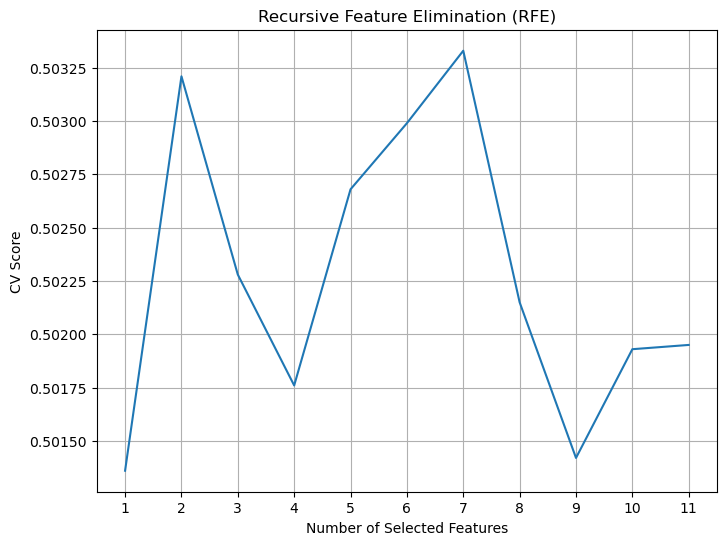

The optimal number of features: 7


In [42]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))


In [43]:
X_rfe = X.iloc[:, rfecv.support_]

# Overview of the optimal features in comparison with the initial dataframe
print("X dimension: {}".format(X.shape))
print("X column list:", X.columns.tolist())
print("X_rfe dimension: {}".format(X_rfe.shape))
print("X_rfe column list:", X_rfe.columns.tolist())


X dimension: (100000, 11)
X column list: ['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Senior_Citizen', 'Total_Charges', 'Location_Houston', 'Location_Los_Angeles', 'Location_Miami', 'Location_New_York']
X_rfe dimension: (100000, 7)
X_rfe column list: ['Gender', 'Subscription_Length_Months', 'Total_Usage_GB', 'Location_Houston', 'Location_Los_Angeles', 'Location_Miami', 'Location_New_York']


In [44]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')


Logistic Regression Classification
accuracy:  0.5015666666666667
precision:  0.4966197183098592
recall:  0.11809230357023244
f1_score:  0.41640285662643267


In [45]:
#svc_model = modeling(SVC, 'SVC Classification')

In [46]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.4941333333333333
precision:  0.4913666550157288
recall:  0.47082858865295735
f1_score:  0.49386449565008483


In [47]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.4988
precision:  0.49638586772951426
recall:  0.492196396275705
f1_score:  0.4987811934751557


In [48]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.5027666666666667
precision:  0.50041928721174
recall:  0.4796704400830598
f1_score:  0.5025062477212814


# Model Optimization

[Text(0.5, 0.875, 'Monthly_Bill <= 0.924\ngini = 0.5\nsamples = 70000\nvalue = [35150, 34850]'),
 Text(0.25, 0.625, 'Total_Usage_GB <= 0.988\ngini = 0.5\nsamples = 64638\nvalue = [32570, 32068]'),
 Text(0.125, 0.375, 'Age <= 24.5\ngini = 0.5\nsamples = 63805\nvalue = [32113, 31692]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Total_Charges <= 60.155\ngini = 0.495\nsamples = 833\nvalue = [457, 376]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Total_Usage_GB <= 0.806\ngini = 0.499\nsamples = 5362\nvalue = [2580, 2782]'),
 Text(0.625, 0.375, 'Total_Charges <= 1283.36\ngini = 0.498\nsamples = 4299\nvalue = [2018, 2281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Total_Usage_GB <= 0.932\ngini = 0.498\nsamples = 1063\nvalue = [562, 501]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

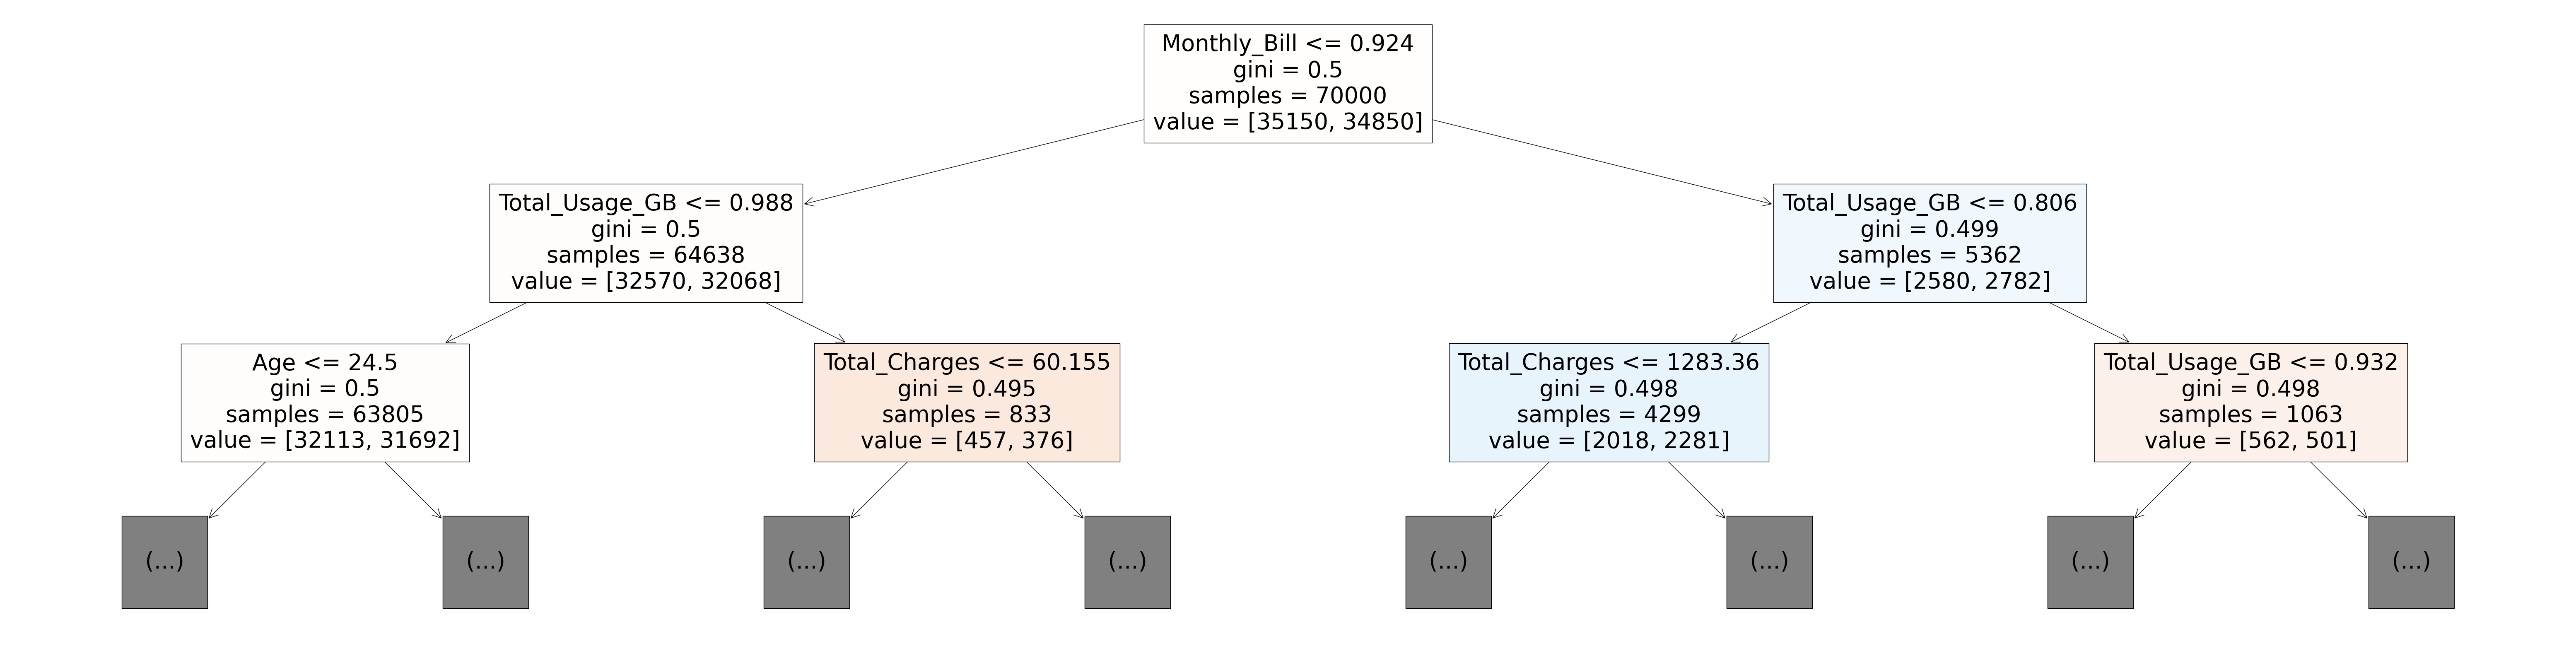

In [49]:
# Convert the column names to a list
feature_names_list = list(X_train.columns)

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 20))
plot_tree(dt_model, feature_names=feature_names_list, max_depth=2, filled=True)


In [50]:
for max_d in range(1,26):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  print('The Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
  print('')

The Accuracy for max_depth 1 is: 0.5050285714285714

The Accuracy for max_depth 2 is: 0.5059

The Accuracy for max_depth 3 is: 0.5063

The Accuracy for max_depth 4 is: 0.5093142857142857

The Accuracy for max_depth 5 is: 0.5106714285714286

The Accuracy for max_depth 6 is: 0.5126571428571428

The Accuracy for max_depth 7 is: 0.5152

The Accuracy for max_depth 8 is: 0.5177142857142857

The Accuracy for max_depth 9 is: 0.5224571428571428

The Accuracy for max_depth 10 is: 0.5274857142857143

The Accuracy for max_depth 11 is: 0.5321428571428571

The Accuracy for max_depth 12 is: 0.5382714285714286

The Accuracy for max_depth 13 is: 0.5449

The Accuracy for max_depth 14 is: 0.5547142857142857

The Accuracy for max_depth 15 is: 0.5641857142857143

The Accuracy for max_depth 16 is: 0.5717571428571429

The Accuracy for max_depth 17 is: 0.5809142857142857

The Accuracy for max_depth 18 is: 0.5929857142857143

The Accuracy for max_depth 19 is: 0.6054428571428572

The Accuracy for max_depth 20 i

In [51]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [52]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [53]:
import joblib

# Save model
joblib.dump(model, "model.pkl")

['model.pkl']

In [54]:
df.dtypes

Age                             int64
Gender                          int64
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                           int64
Senior_Citizen                  int64
Total_Charges                 float64
Location_Houston                uint8
Location_Los_Angeles            uint8
Location_Miami                  uint8
Location_New_York               uint8
dtype: object

# Test

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have X_train, y_train, X_test, and y_test already defined

for max_d in range(1, 22):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print('For max_depth {}:'.format(max_d))
    print('  Training Accuracy: {:.4f}'.format(train_accuracy))
    print('  Testing Accuracy:  {:.4f}'.format(test_accuracy))
    print('')


For max_depth 1:
  Training Accuracy: 0.5050
  Testing Accuracy:  0.5025

For max_depth 2:
  Training Accuracy: 0.5059
  Testing Accuracy:  0.5028

For max_depth 3:
  Training Accuracy: 0.5063
  Testing Accuracy:  0.5024

For max_depth 4:
  Training Accuracy: 0.5093
  Testing Accuracy:  0.5052

For max_depth 5:
  Training Accuracy: 0.5107
  Testing Accuracy:  0.5069

For max_depth 6:
  Training Accuracy: 0.5127
  Testing Accuracy:  0.5074

For max_depth 7:
  Training Accuracy: 0.5152
  Testing Accuracy:  0.5055

For max_depth 8:
  Training Accuracy: 0.5177
  Testing Accuracy:  0.5049

For max_depth 9:
  Training Accuracy: 0.5225
  Testing Accuracy:  0.5064

For max_depth 10:
  Training Accuracy: 0.5275
  Testing Accuracy:  0.5037

For max_depth 11:
  Training Accuracy: 0.5321
  Testing Accuracy:  0.5057

For max_depth 12:
  Training Accuracy: 0.5383
  Testing Accuracy:  0.5055

For max_depth 13:
  Training Accuracy: 0.5449
  Testing Accuracy:  0.5047

For max_depth 14:
  Training Accur